In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np 
import warnings 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# 데이터 로드 

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = data.target

# Train-valid-split 
indx = int(len(df)*0.1)
train_df = df.iloc[:indx*8,:] 
test_df = df.iloc[indx*8:,:]

# 함수 선언 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def random_sampling(df,ratio,cfg):
    temp_df = df.sample(frac=ratio)
    df_y = temp_df[cfg['feature']]['target']
    df_x = temp_df[cfg['feature']].drop(columns='target')
    return df_x, df_y 

def ineference(model_list,x):
    predicted = [] 
    for model in model_list:
        y_pred = model.predict(x)
        predicted.append(y_pred)
    y_pred = np.mean(predicted,axis=0)
    return y_pred 

def metric(model_list,cfg):
    train_x,train_y = random_sampling(train_df,1,cfg)
    test_x,test_y = random_sampling(test_df,1,cfg)

    train_y_pred = ineference(model_list,train_x)
    test_y_pred = ineference(model_list,test_x)
    train_loss = mean_absolute_error(train_y,train_y_pred)
    test_loss = mean_absolute_error(test_y,test_y_pred)

    #print(f"Train MAE : {train_loss}")
    #print(f"Test MAE : {test_loss}")
    return train_loss, test_loss 

def train_epoch(cfg):
    model_save = [] 
    for model_name in cfg['model']:
        for i in range(cfg['num_iter']):
            train_x,train_y = random_sampling(train_df,cfg['ratio'],cfg)
            model = model_name()
            model.fit(train_x,train_y)
            model_save.append(model)
    return model_save


# 배깅 - Data ratio
- 모델 ratio 
- feature 
- model 종류 

100%|██████████| 20/20 [00:13<00:00,  1.54it/s]


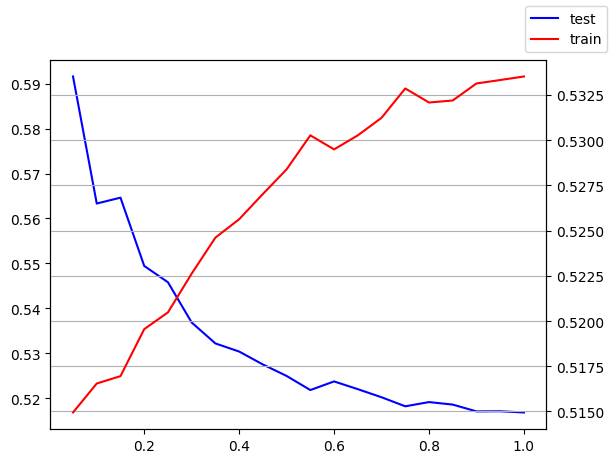

In [209]:
from sklearn.tree import DecisionTreeRegressor
cfg = {} 
cfg['num_iter'] = 100 
cfg['model'] = [LinearRegression]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']

total_train = []
total_test = [] 
for ratio in tqdm(list(np.arange(0.05,1.05,0.05))):
    cfg['ratio'] = ratio 
    model_list = train_epoch(cfg)
    train_loss,test_loss = metric(model_list,cfg)

    total_train.append(train_loss)
    total_test.append(test_loss)
total_test = np.array(total_test)
total_train = np.array(total_train)

fig,ax = plt.subplots()
ax.plot(list(np.arange(0.05,1.05,0.05)),total_test,color='b',label='test')
ax1 = ax.twinx()
ax1.plot(list(np.arange(0.05,1.05,0.05)),total_train,color='r',label='train')
fig.legend()
plt.grid(True)

plt.show()

100%|██████████| 20/20 [02:01<00:00,  6.08s/it]


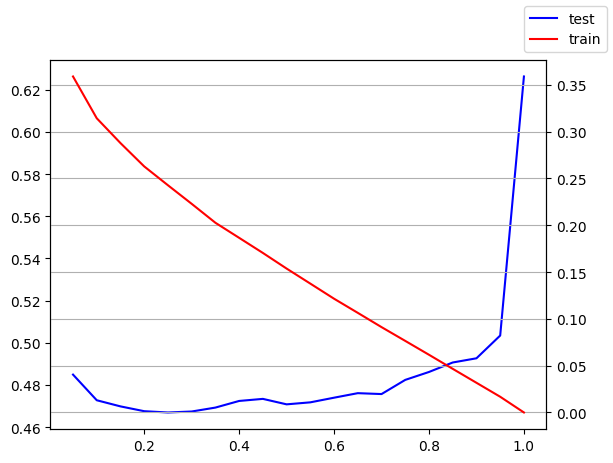

In [204]:
from sklearn.tree import DecisionTreeRegressor
cfg = {} 
cfg['num_iter'] = 100 
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']

total_train = []
total_test = [] 
for ratio in tqdm(list(np.arange(0.05,1.05,0.05))):
    cfg['ratio'] = ratio 
    model_list = train_epoch(cfg)
    train_loss,test_loss = metric(model_list,cfg)

    total_train.append(train_loss)
    total_test.append(test_loss)
total_test = np.array(total_test)
total_train = np.array(total_train)

fig,ax = plt.subplots()
ax.plot(list(np.arange(0.05,1.05,0.05)),total_test,color='b',label='test')
ax1 = ax.twinx()
ax1.plot(list(np.arange(0.05,1.05,0.05)),total_train,color='r',label='train')
fig.legend()
plt.grid(True)

plt.show()

# 배깅 - 반복 횟수 

100%|██████████| 20/20 [09:21<00:00, 28.07s/it]


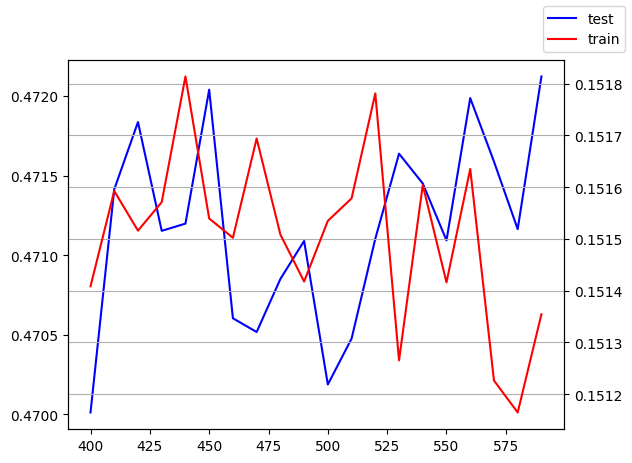

In [206]:
from sklearn.tree import DecisionTreeRegressor
cfg = {} 
cfg['ratio'] = 0.5
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']

total_train = []
total_test = [] 
Range=  list(np.arange(400,600,10))
for num_iter in tqdm(Range):
    cfg['num_iter'] = num_iter 
    model_list = train_epoch(cfg)
    train_loss,test_loss = metric(model_list,cfg)

    total_train.append(train_loss)
    total_test.append(test_loss)
total_test = np.array(total_test)
total_train = np.array(total_train)

fig,ax = plt.subplots()
ax.plot(list(Range),total_test,color='b',label='test')
ax1 = ax.twinx()
ax1.plot(list(Range),total_train,color='r',label='train')
fig.legend()
plt.grid(True)

plt.show()

100%|██████████| 99/99 [05:05<00:00,  3.08s/it]


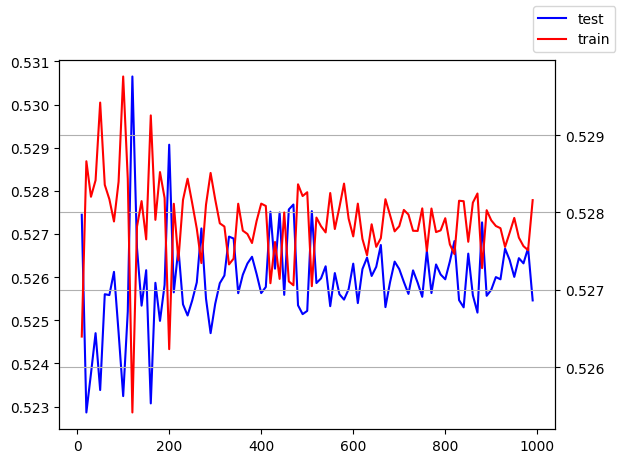

In [208]:
from sklearn.tree import DecisionTreeRegressor
cfg = {} 
cfg['ratio'] = 0.5
cfg['model'] = [LinearRegression]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']

total_train = []
total_test = [] 
Range=  list(np.arange(10,1000,10))
for num_iter in tqdm(Range):
    cfg['num_iter'] = num_iter 
    model_list = train_epoch(cfg)
    train_loss,test_loss = metric(model_list,cfg)

    total_train.append(train_loss)
    total_test.append(test_loss)
total_test = np.array(total_test)
total_train = np.array(total_train)

fig,ax = plt.subplots()
ax.plot(list(Range),total_test,color='b',label='test')
ax1 = ax.twinx()
ax1.plot(list(Range),total_train,color='r',label='train')
fig.legend()
plt.grid(True)

plt.show()

# 모델 앙상블 

100%|██████████| 6/6 [00:52<00:00,  8.79s/it]


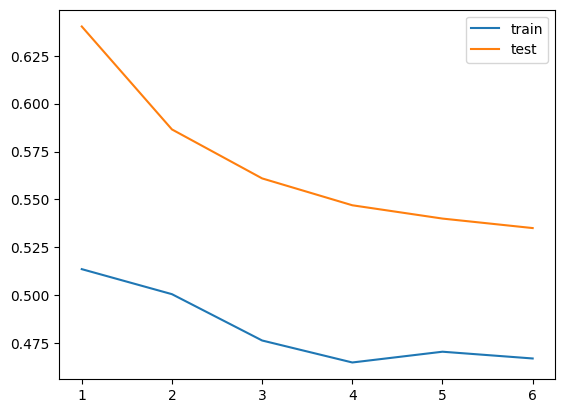

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge,TweedieRegressor,SGDRegressor
from sklearn.svm import SVR 
from sklearn.svm import LinearSVR
cfg = {} 
cfg['ratio'] = 1
cfg['num_iter'] = 1 
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']
model_kind = [DecisionTreeRegressor,LinearRegression,SVR,BayesianRidge,Ridge,TweedieRegressor]                

train = []
test = [] 
Range = list(np.arange(1,len(model_kind)+1,1))
for i in range(300):
    total_train = []
    total_test = []     
    for model_num in tqdm(Range):
        cfg['model'] = np.random.choice(model_kind,model_num,replace=False)
        model_save = train_epoch(cfg)
        train_loss,test_loss = metric(model_save,cfg)

        total_train.append(train_loss)
        total_test.append(test_loss)
    
    total_test = np.array(total_test)
    total_train = np.array(total_train)
    
    train.append(total_train)
    test.append(total_test)
                        
train = np.mean(np.array(train),axis=0)
test = np.mean(np.array(test),axis=0)    

plt.plot(list(Range),train,label='train')
plt.plot(list(Range),test,label='test')
plt.legend()
plt.show()

# Feature 앙상블 

100%|██████████| 300/300 [02:27<00:00,  2.03it/s]


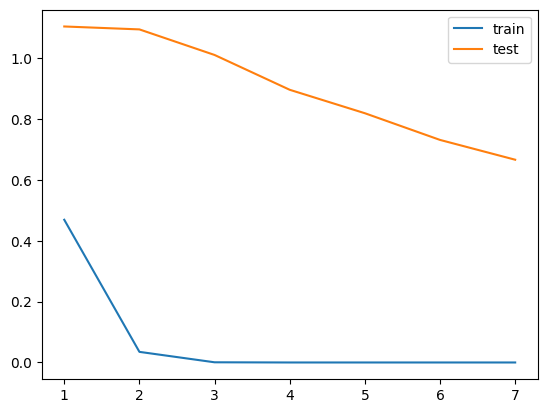

In [5]:
cfg = {} 
cfg['ratio'] = 1
cfg['num_iter'] = 1
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = []
features_kind = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude']               
                
train = []
test = [] 
Range = list(np.arange(1,len(features_kind),1))
for i in tqdm(range(300)):
    total_train = []
    total_test = [] 
    for features_num in Range:
        #Feature choice 
        selected_features = list(np.random.choice(features_kind,features_num,replace=False))
        selected_features.append('target')
        cfg['feature'] = selected_features
        #Train 
        model_save = train_epoch(cfg)
        train_loss,test_loss = metric(model_save,cfg)
        #Save 
        total_train.append(train_loss)
        total_test.append(test_loss)
    
    total_test = np.array(total_test)
    total_train = np.array(total_train)
    
    train.append(total_train)
    test.append(total_test)

train = np.mean(np.array(train),axis=0)
test = np.mean(np.array(test),axis=0)    

plt.plot(Range,train,label='train')
plt.plot(Range,test,label='test')
plt.legend()
plt.show()

# 앙상블 of 앙상블 

In [176]:
cfg = {} 
cfg['ratio'] = 0.4
cfg['num_iter'] = 100
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = []
features_kind = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude']               
model_kind = [DecisionTreeRegressor,LinearRegression,SVR,BayesianRidge,Ridge,TweedieRegressor]                
           
train = []
test = [] 
Feature_num = 6
Model_num = 6
for i in tqdm(range(1)):
    total_train = []
    total_test = [] 
    
    #Feature choice 
    selected_features = list(np.random.choice(features_kind,Feature_num,replace=False))
    selected_features.append('target')
    cfg['feature'] = selected_features

    #Model Choice 
    cfg['model'] = np.random.choice(model_kind,Model_num,replace=False)
    #Train 
    model_save = train_epoch(cfg)
    print('model train done')
    train_loss,test_loss = metric(model_save,cfg)
    #Save 
    total_train.append(train_loss)
    total_test.append(test_loss)

    total_test = np.array(total_test)
    total_train = np.array(total_train)
    
    train.append(total_train)
    test.append(total_test)

train = np.mean(np.array(train),axis=0)
test = np.mean(np.array(test),axis=0)    

plt.plot(Range,train,label='train')
plt.plot(Range,test,label='test')
plt.legend()
plt.show()

print(f" Train loss = {train}")
print(f" Test loss = {test}")

 Train loss = [0.62767165]
 Test loss = [0.68616979]


In [194]:
from sklearn.ensemble import RandomForestRegressor
train_x,train_y = random_sampling(train_df,1,cfg)
test_x,test_y = random_sampling(test_df,1,cfg)
model = RandomForestRegressor()
model.fit(train_x,train_y)
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)
train_loss = mean_absolute_error(train_y,train_y_pred)
test_loss = mean_absolute_error(test_y,test_y_pred)
print(train_loss,test_loss)

0.10856000014534917 0.600936215479651


In [201]:
from sklearn.ensemble import RandomForestRegressor
train_x,train_y = random_sampling(train_df,1,cfg)
test_x,test_y = random_sampling(test_df,1,cfg)
model = LinearRegression()
model.fit(train_x,train_y)
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)
train_loss = mean_absolute_error(train_y,train_y_pred)
test_loss = mean_absolute_error(test_y,test_y_pred)
print(train_loss,test_loss)

0.7336428591704492 0.7048607827632909


0